In [1]:
# This code allows you to input values from the NACA airfoil designation and will output a plot of the airfoil
# X values of the points are saved in the array 'x'
# Two sets of Y values of the points are stored in the arrays 'y_abovearray' and 'y_belowarray'
# The last cell prints out a list of the values which can be copied to a text file and imported to excel.

In [2]:
#naca2412 
m = 0.02 #First digit in number devided by 100
p = 0.4  #Second digit in number devided by 10
t = 0.12 #Last two digits in number divided by 100
c = 1.0

In [3]:
%matplotlib inline
import math
import matplotlib.pyplot as pyplot
import numpy as np

In [4]:
def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

In [5]:
def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - x / c),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - x / c ))

In [6]:
def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

In [7]:
def naca4(x, m, p, t, c=1):
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)  
    return ((x - yt*np.sin(th), yc + yt*np.cos(th)), 
            (x + yt*np.sin(th), yc - yt*np.cos(th)))

(-0.05, 1.05)

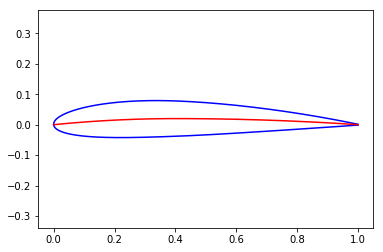

In [8]:
x = np.linspace(0,1,1000)     # This defines how many points to generate
for item in naca4(x, m, p, t, c):
    pyplot.plot(item[0], item[1], 'b')
pyplot.plot(x, camber_line(x, m, p, c), 'r')
pyplot.axis('equal')
pyplot.xlim((-0.05, 1.05))
# figure.set_size_inches(16,16,forward=True)

In [9]:
itemlist = list(item)
y_abovelist, y_belowlist = map(list, zip(itemlist))
y_abovearray = np.squeeze(np.asarray(y_abovelist))
y_belowarray = np.squeeze(np.asarray(y_belowlist))
x_list = list(x)

list_of_lists = list([x, y_abovearray, y_belowarray])

for a in zip(*list_of_lists):
    print(*a)

0.0 0.0 0.0
0.001001001001 0.00155289202017 -0.00543278107755
0.002002002002 0.00277611177759 -0.00758033768075
0.003003003003 0.00394452888593 -0.00918730559196
0.004004004004 0.00508435828675 -0.0105143834688
0.00500500500501 0.00620578166967 -0.0116625485288
0.00600600600601 0.00731403441907 -0.0126835871188
0.00700700700701 0.00841223457809 -0.0136082622785
0.00800800800801 0.00950241891497 -0.0144566176344
0.00900900900901 0.0105860057859 -0.0152425754606
0.01001001001 0.0116640305281 -0.0159762724713
0.011011011011 0.0127372767424 -0.0166653610973
0.012012012012 0.0138063547761 -0.0173157865697
0.013013013013 0.0148717512623 -0.0179322768872
0.014014014014 0.0159338617871 -0.0185186655694
0.015015015015 0.0169930132226 -0.0190781120679
0.016016016016 0.0180494794635 -0.0196132569059
0.017017017017 0.0191034928039 -0.0201263337235
0.018018018018 0.0201552523473 -0.0206192520135
0.019019019019 0.021204930345 -0.021093659408
0.02002002002 0.0222526770543 -0.0215509893727
0.021021021

0.299299299299 0.300809764489 -0.0412657786838
0.3003003003 0.301795760613 -0.041241092222
0.301301301301 0.3027817453 -0.0412162006486
0.302302302302 0.30376771894 -0.0411911058903
0.303303303303 0.304753681919 -0.0411658098613
0.304304304304 0.305739634623 -0.0411403144638
0.305305305305 0.306725577432 -0.0411146215874
0.306306306306 0.307711510729 -0.0410887331101
0.307307307307 0.30869743489 -0.0410626508976
0.308308308308 0.309683350293 -0.0410363768041
0.309309309309 0.31066925731 -0.0410099126719
0.31031031031 0.311655156315 -0.0409832603319
0.311311311311 0.312641047675 -0.0409564216036
0.312312312312 0.313626931759 -0.0409293982949
0.313313313313 0.314612808934 -0.0409021922028
0.314314314314 0.315598679561 -0.0408748051129
0.315315315315 0.316584544003 -0.0408472388
0.316316316316 0.317570402619 -0.0408194950279
0.317317317317 0.318556255766 -0.0407915755496
0.318318318318 0.319542103801 -0.0407634821075
0.319319319319 0.320527947077 -0.0407352164334
0.32032032032 0.321513785

0.828828828829 0.827735004909 -0.0131728570916
0.82982982983 0.828738934943 -0.0131058166465
0.830830830831 0.829742896923 -0.0130387535936
0.831831831832 0.830746890899 -0.0129716678551
0.832832832833 0.831750916918 -0.0129045593519
0.833833833834 0.832754975029 -0.0128374280027
0.834834834835 0.833759065281 -0.0127702737247
0.835835835836 0.834763187723 -0.0127030964332
0.836836836837 0.835767342404 -0.0126358960418
0.837837837838 0.836771529373 -0.0125686724623
0.838838838839 0.837775748679 -0.0125014256047
0.83983983984 0.838780000371 -0.0124341553774
0.840840840841 0.8397842845 -0.0123668616867
0.841841841842 0.840788601115 -0.0122995444374
0.842842842843 0.841792950265 -0.0122322035326
0.843843843844 0.842797332001 -0.0121648388735
0.844844844845 0.843801746373 -0.0120974503594
0.845845845846 0.84480619343 -0.0120300378882
0.846846846847 0.845810673223 -0.0119626013557
0.847847847848 0.846815185803 -0.0118951406563
0.848848848849 0.847819731219 -0.0118276556822
0.84984984985 0.84